## Tutorial 2 


03/03/2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## EXERCICE 1 -  Newton Interpolation

In [2]:
x = np.array([-5.,0,4,5])
y = np.array([2,1,10,1])

In [3]:
a1=2
a2=-1/5
a3=49/180
a4=-227/900

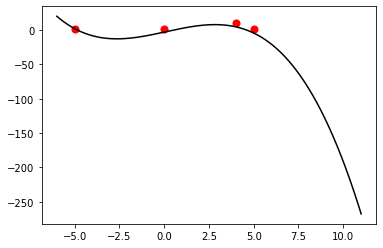

In [4]:
xs = np.linspace(-6, 11, num=1000)
ys = a1+ a2*(xs+5)**2 + a3*(xs+5)*xs + a4 *(xs+5)*xs*(xs-5)
plt.scatter(x, y, s=50, color='red')
plt.plot( xs, ys, color='black');

In [5]:
class Newton_interpolation():
    """x, y : data points in numpy.array type """
    def __init__(self, x=x, y=y):
        self.x = x
        self.y = y
    
    
    def Newton_coefficients (self): 
        self.x.astype(float)
        self.y.astype(float)
        n = len(self.x)
        a = []
        for i in range(n):
            a.append(self.y[i])
        for j in range(1, n):
            for i in range(n-1, j-1, -1):
                a[i] = float(a[i]-a[i-1])/float(self.x[i]-self.x[i-j])
        return np.array(a) # array of coefficient

    def eval_newton(self,r):
        a = self.Newton_coefficients()
        self.x.astype(float)
        n = len(a) - 1
        temp = a[n] + (r - x[n])
        for i in range( n - 1, -1, -1 ):
            temp = temp * ( r - x[i] ) + a[i]
        return temp #y_value interpolation
        
    def plot_point(self):
        return (plt.scatter( x, y, s=50, color='red'))
        
    
    def plot_polynomial(self):
        xs = np.linspace(self.x[0]-1, self.x[len(self.x)-1]+1, num=1000)
        l=[]
        for i in xs :
            l.append(self.eval_newton(i))
        self.plot_point()
        return (plt.plot( xs, l, color='black'))

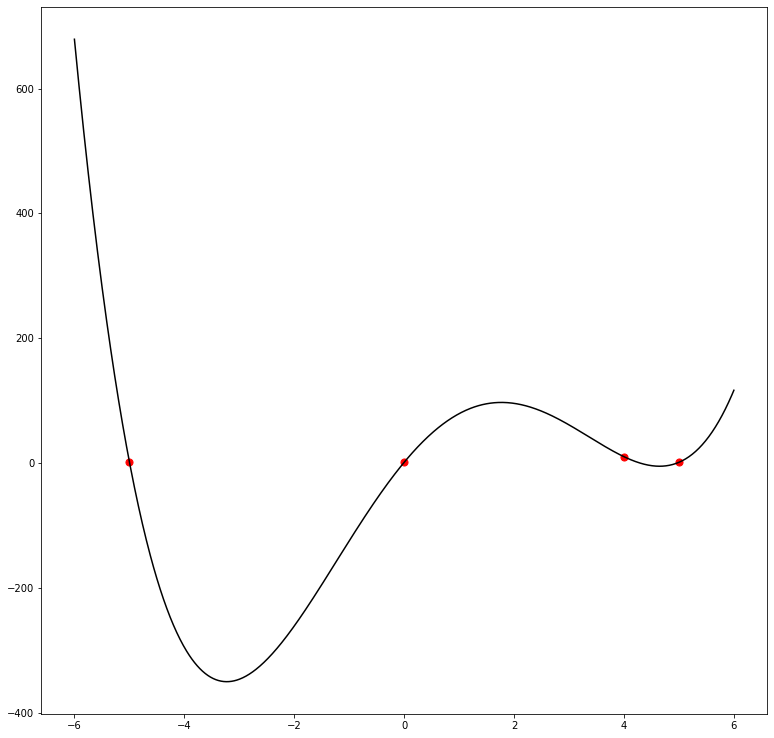

In [6]:
fig = plt.figure(figsize=(13, 13))
lag = Newton_interpolation(x,y)
lag.plot_polynomial();

## EXERCICE 2 - Simple Linear Regression 


In [7]:
x = np.array([-5,0,5,10])
y = np.array([10.1,3.5,-1.2,-6.8])

In [8]:
## calculate the mean
xbar = x.mean()
ybar = y.mean()
ybar

1.4000000000000001

In [9]:
## calculate the sum of squared deviations
St = sum((y-ybar)**2)
St

154.09999999999997

In [10]:
yhat = 3.1-x

In [11]:
## calculate the sum of squares of the errors
Sr = sum((y-yhat)**2)
Sr 

4.66

In [12]:
##coefficient of determination
R2 = 1-float(Sr/St)
R2

0.9697598961713173

In [13]:
##standard Error of Estimate
n=len(y)
m = 2
import math

Syx = math.sqrt(Sr/(n-m))
Syx

1.5264337522473748

In [14]:
##MSE
n =4
(1/n) *Sr

1.165

## EXERCICE 2bis - Simple Linear Regression 

In [15]:
x = np.array([1,3,11,13])
y = np.array([-1,3,17,21])

In [16]:

yhat = -3+2*x


xbar = x.mean()
ybar = y.mean()


In [17]:
## calculate the sum of squared deviations
St = sum((y-ybar)**2)
St

340.0

In [18]:
## calculate the sum of squares of the errors
Sr = sum((y-yhat)**2)
Sr 

8

In [19]:
##coefficient of determination
R2 = 1-float(Sr/St)
R2

0.9764705882352941

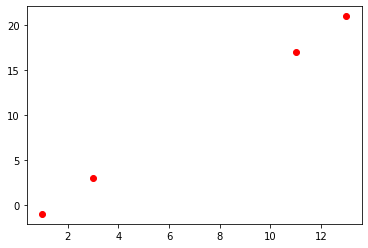

In [20]:
plt.scatter(x,y,color='red' );

In [21]:
beta = sum((x - xbar)*(y-ybar))/ sum((x-xbar)**2)
alpha = ybar - beta*xbar
alpha

-2.6538461538461533

In [22]:
xs = np.linspace(0, 20, num=1000)
linear_regression_Line = alpha +beta*xs

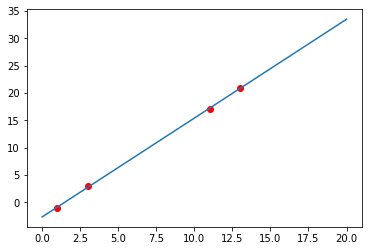

In [23]:
plt.scatter(x,y,color='red' );
plt.plot(xs,linear_regression_Line );

## EXERCICE 3 - Multiple Linear Regression 



In [24]:
from sklearn import *
from sklearn.datasets import load_boston
import pandas as pd

In [25]:
boston = load_boston()

In [26]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [27]:
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

- CRIM per capita crime rate by town

- ZN proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS proportion of non-retail business acres per town

- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- NOX nitric oxides concentration (parts per 10 million)

- RM average number of rooms per dwelling

- AGE proportion of owner-occupied units built prior to 1940

- DIS weighted distances to five Boston employment centres

- RAD index of accessibility to radial highways

- TAX full-value property-tax rate per $10,000

- PTRATIO pupil-teacher ratio by town

- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT % lower status of the population

- MEDV Median value of owner-occupied homes in $1000’s

In [28]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

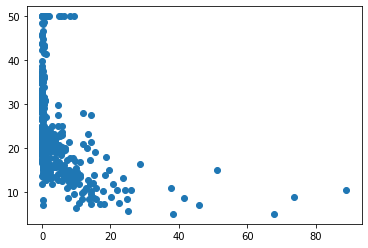

In [29]:
plt.scatter(X['CRIM'], Y);

In [30]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X, Y)
#coefficients for the predictors
model.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [31]:
lm.intercept_

36.45948838508978